In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
bank=pd.read_csv("bank-full.csv", sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank['y'] = le.fit_transform(bank['y'])

In [6]:
bank['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

# Data Visualization

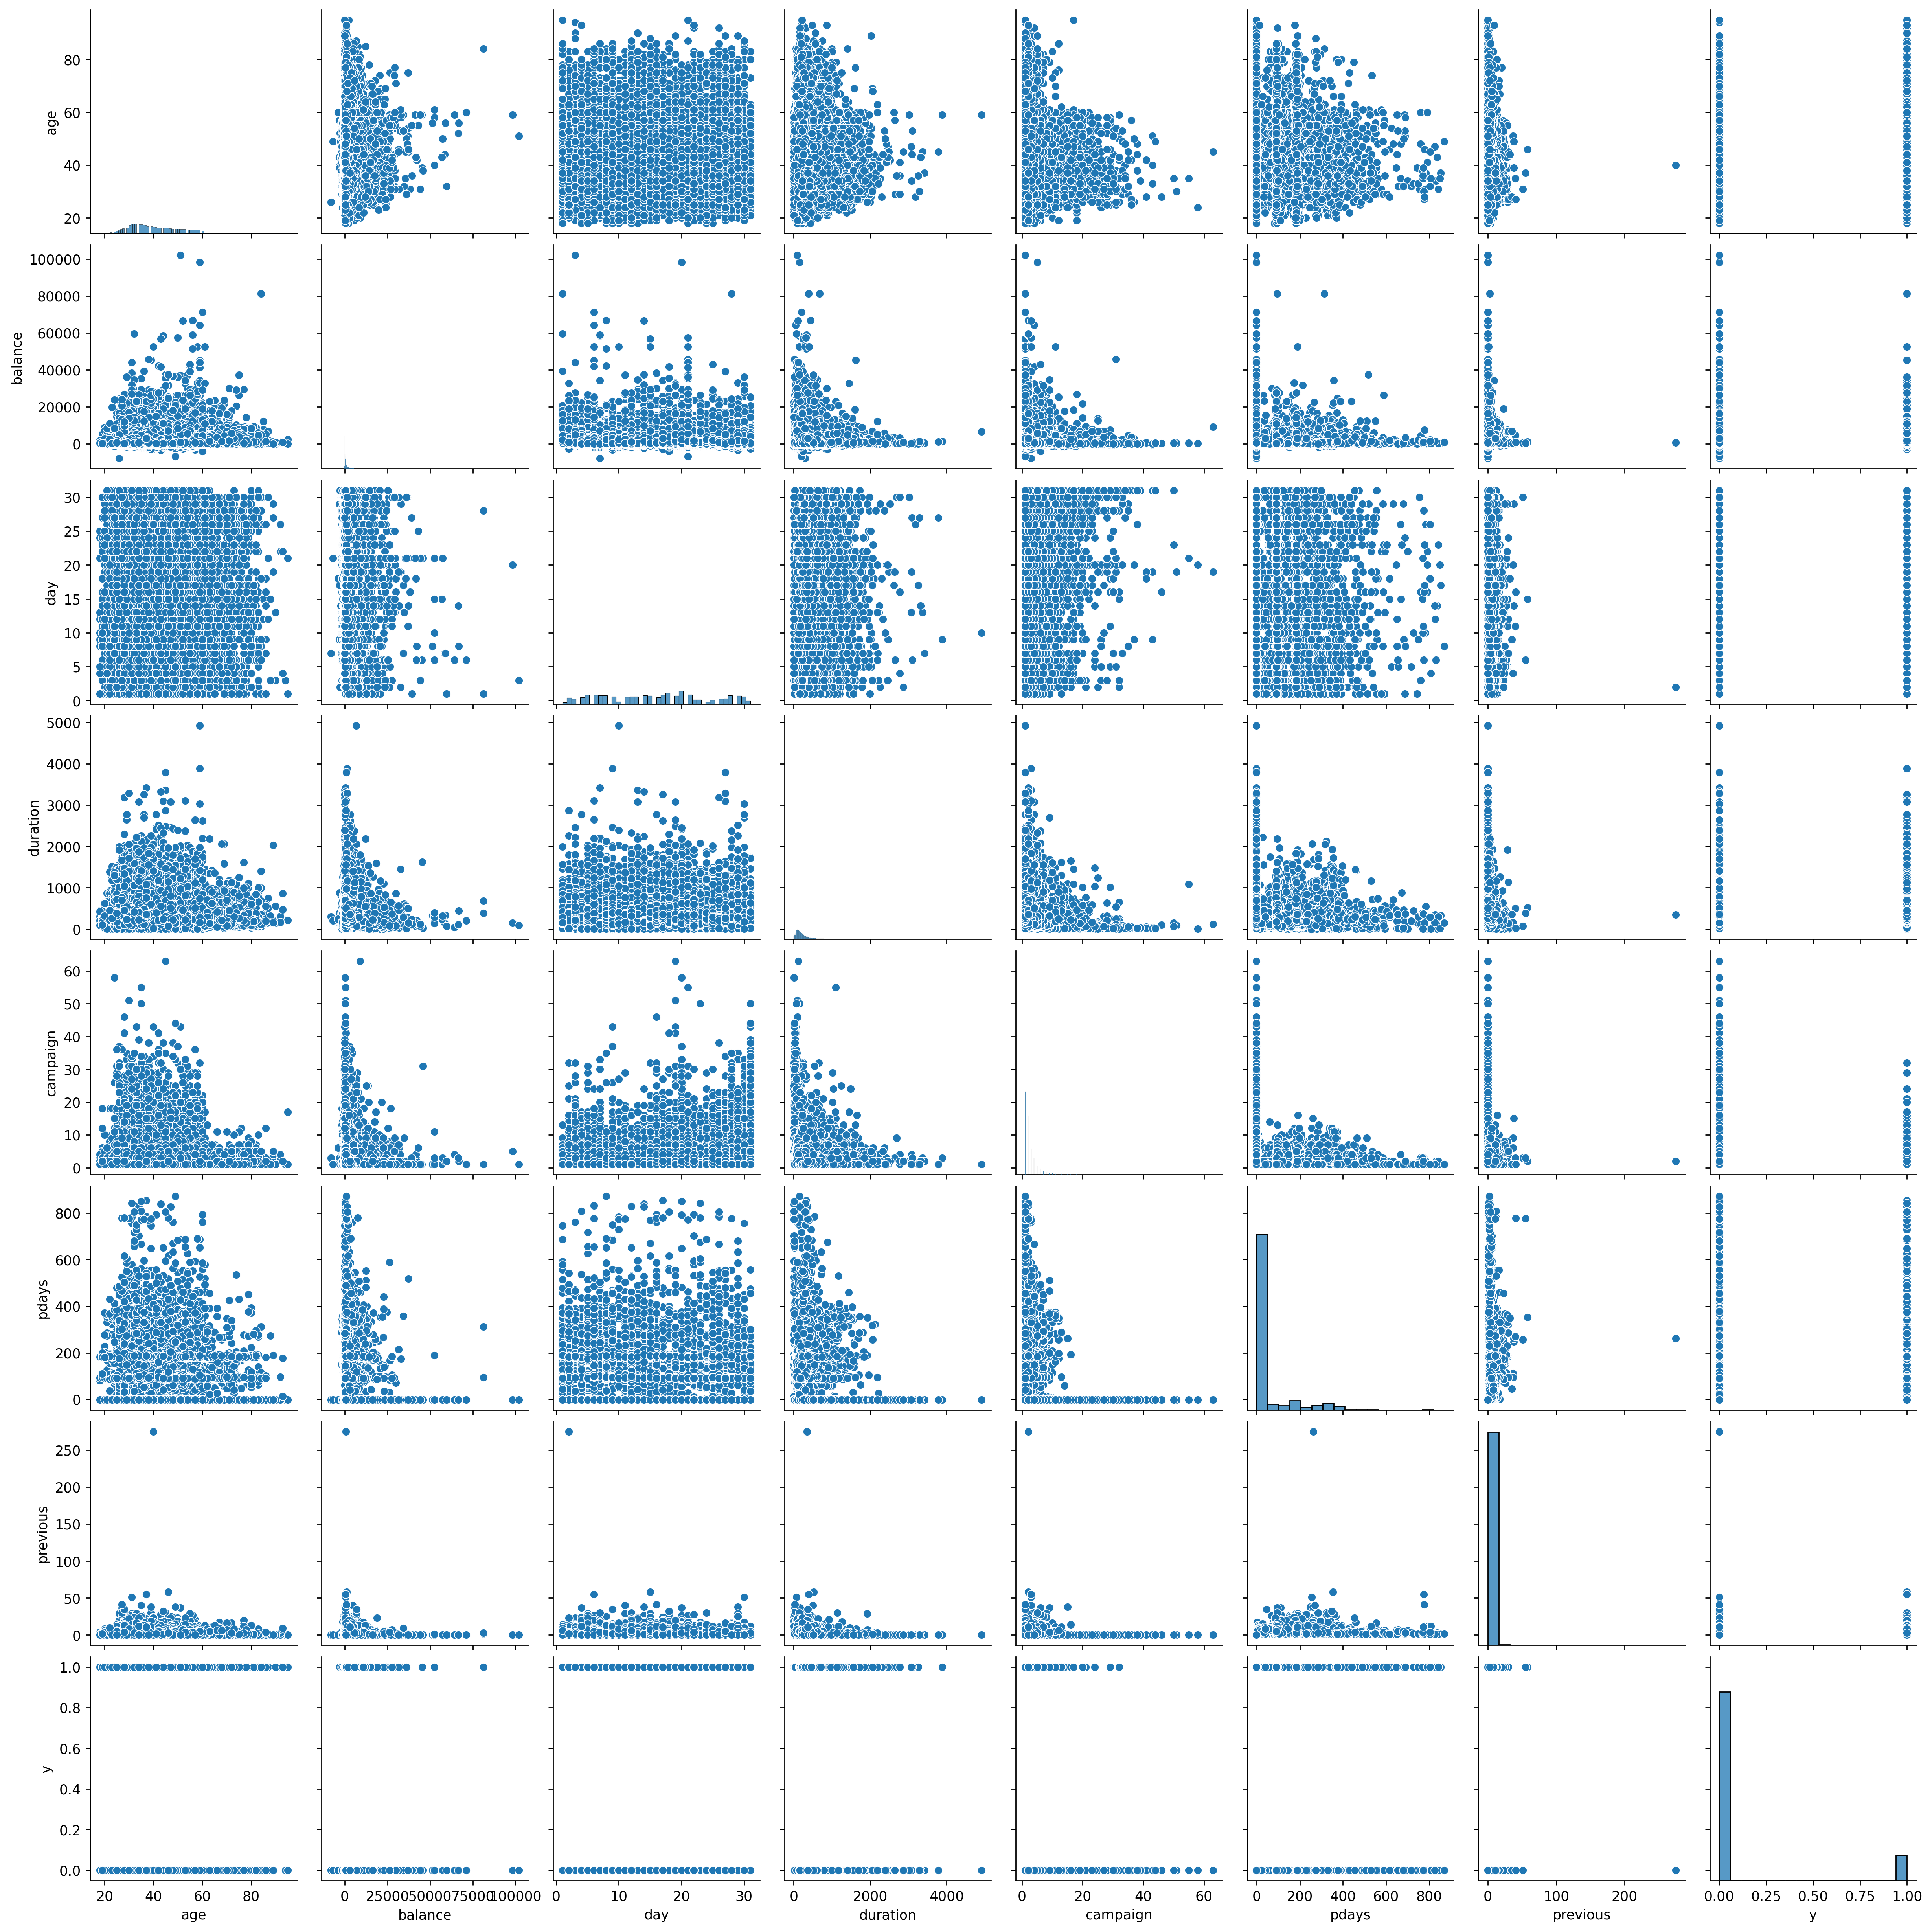

In [7]:
sns.pairplot(bank);

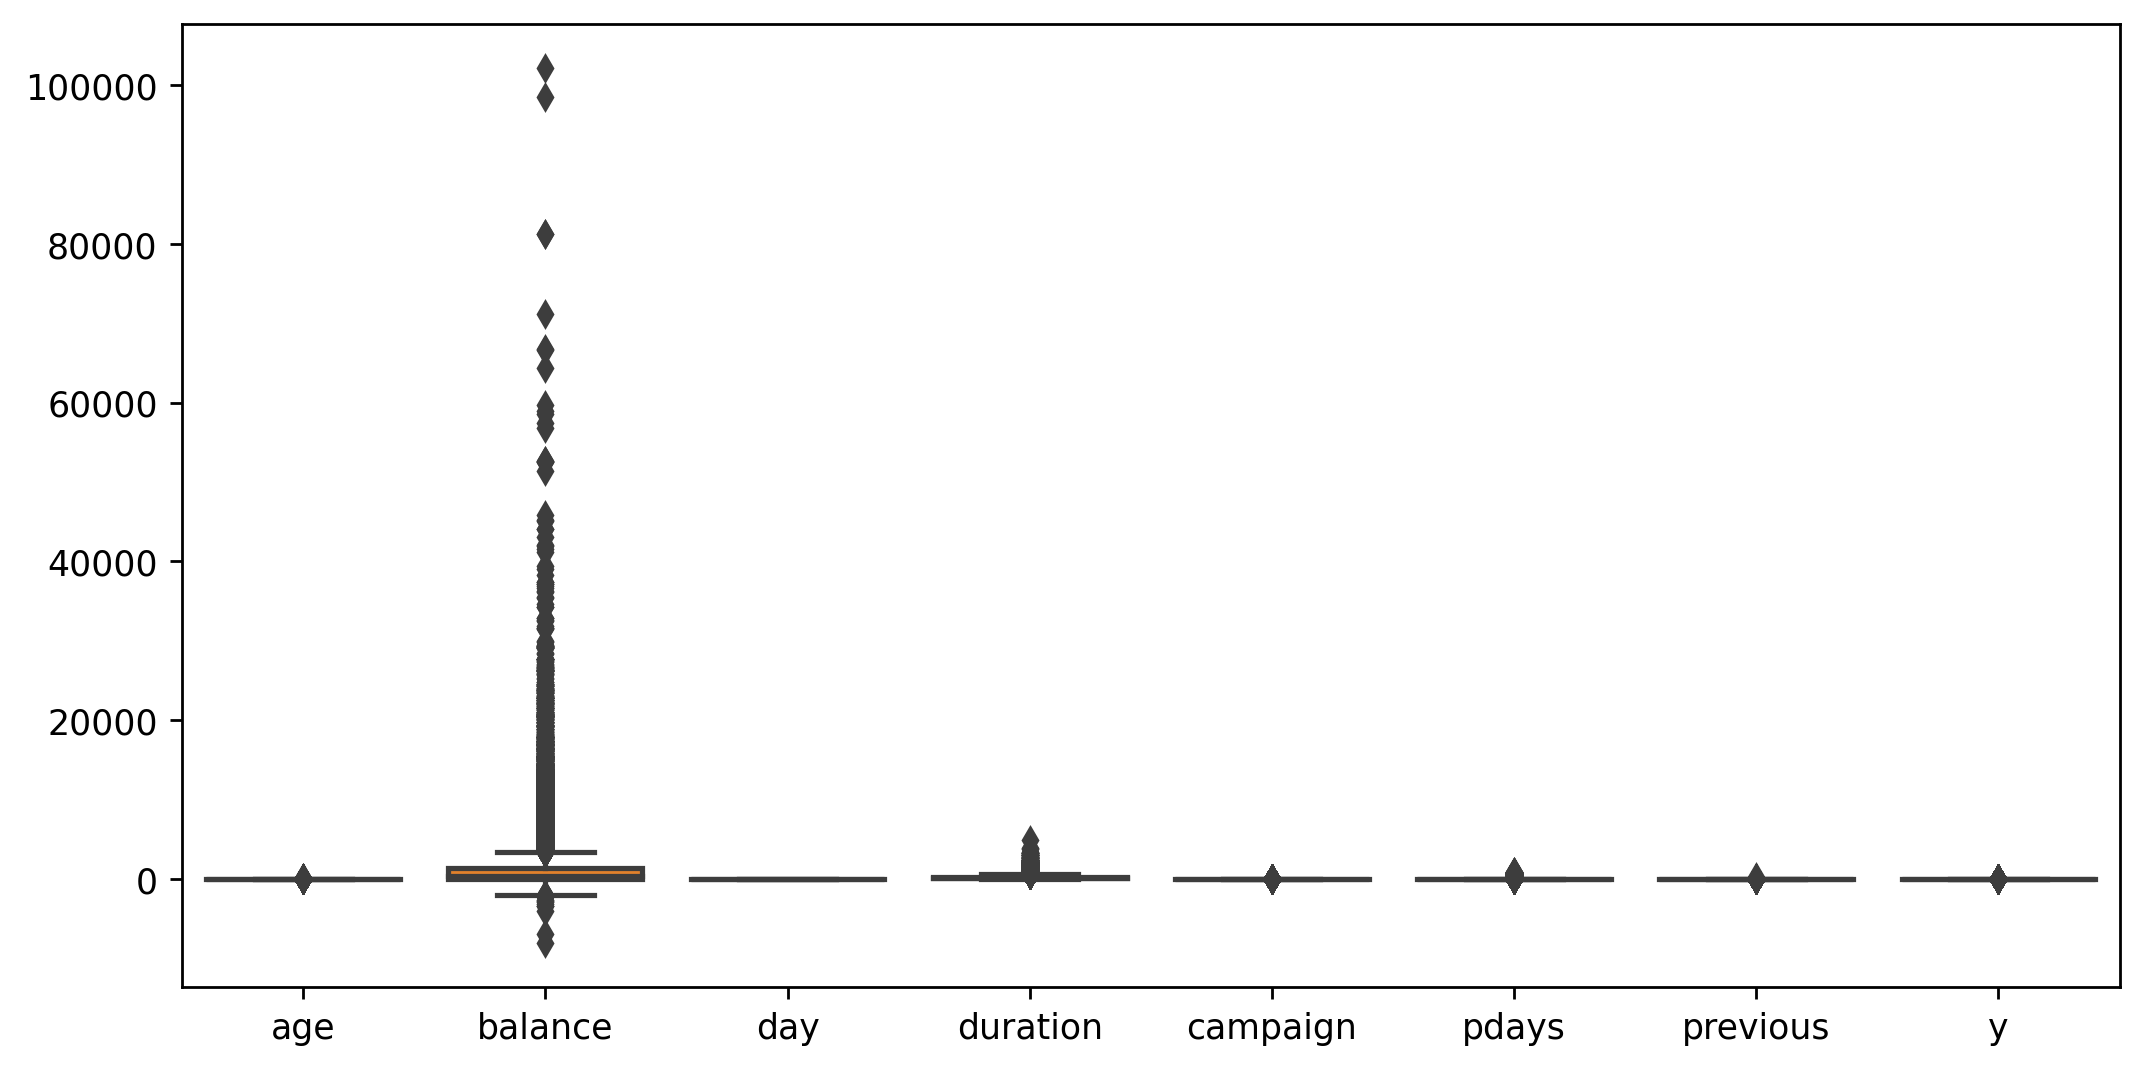

In [8]:
sns.boxplot(bank);

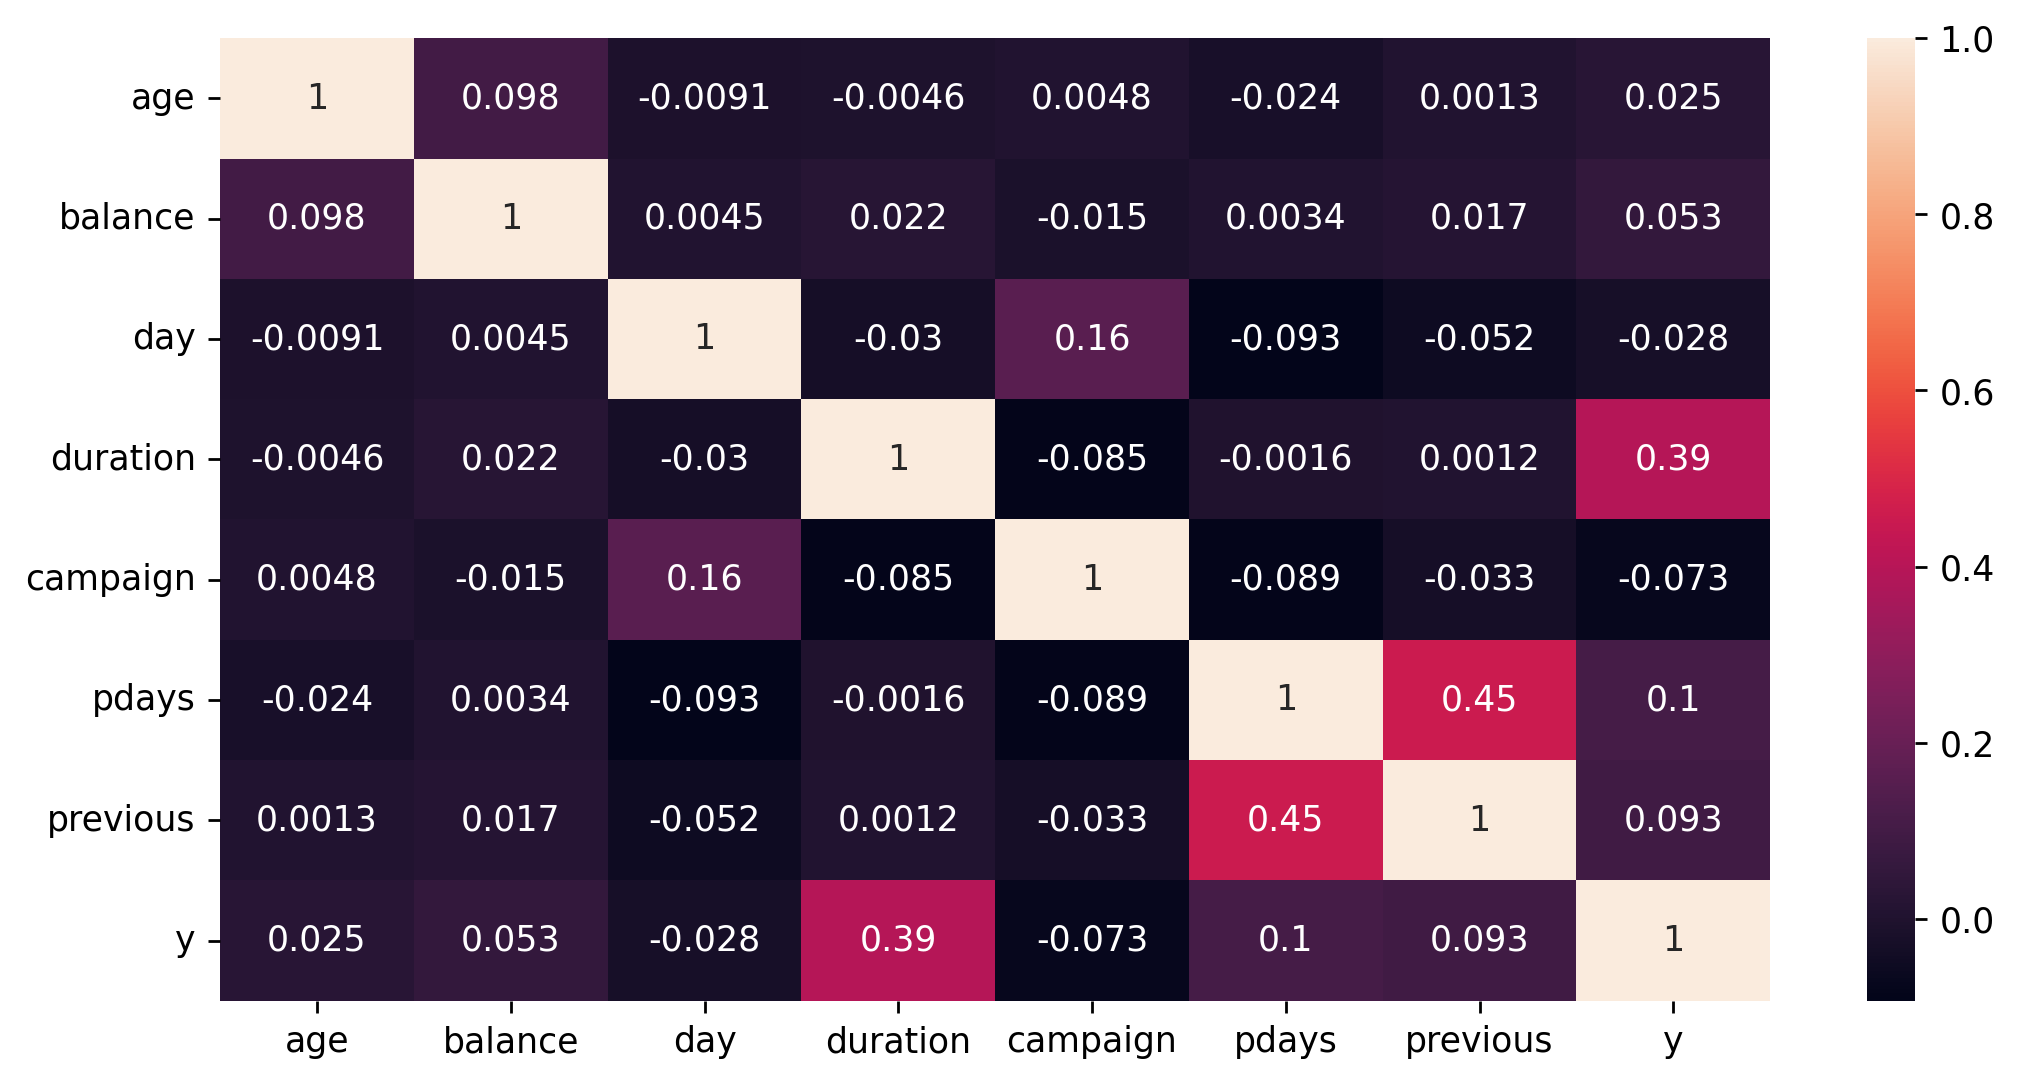

In [9]:
sns.heatmap(bank.corr(), annot=True);

# Model Building 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
X=bank.iloc[:,[0,5,9,11,12,13,14]]
Y=bank.iloc[:,-1]
Lg=LogisticRegression()
Lg.fit(X,Y)

LogisticRegression()

In [12]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [13]:
pred=Lg.predict_proba(X)

In [14]:
pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': Lg.predict(X)})

In [15]:
pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [16]:
YY=Lg.predict(X)
YY

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
bank['Prediction']=YY
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Prediction
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0


In [18]:
CM=confusion_matrix(Y,YY)
CM

array([[39274,   648],
       [ 4471,   818]], dtype=int64)

In [19]:
accuracy=((39274+818)/(39274+648+4471+818))*100
accuracy

88.67753422839574

# Evalation 

In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,YY))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.15      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


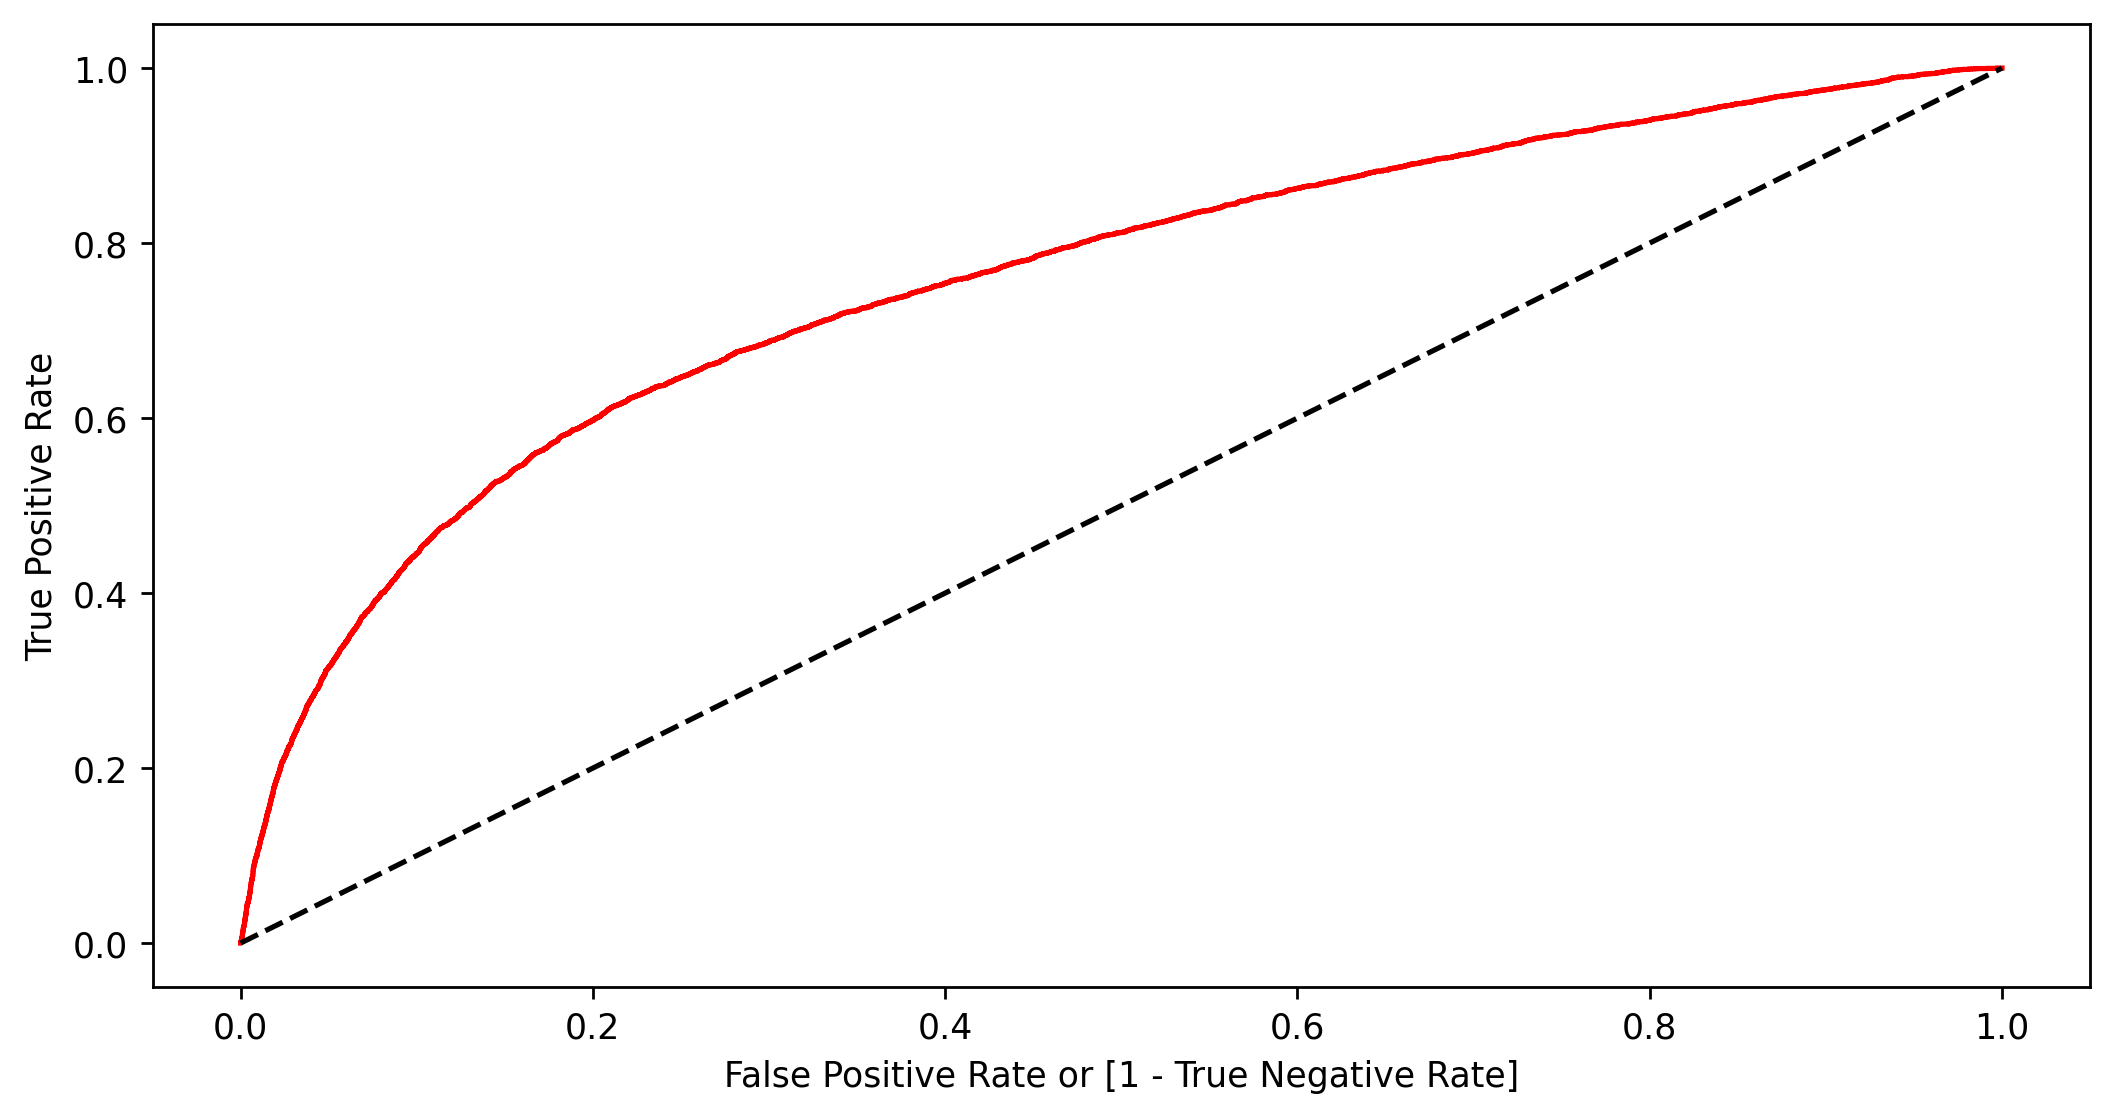

In [23]:
fpr, tpr, thresholds = roc_curve(Y, Lg.predict_proba (X)[:,1])

auc = roc_auc_score(Y, YY)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [24]:
auc

0.5692144823263748

# By Using Train_Test_Split

In [25]:
array=bank.values
array

array([[58, 'management', 'married', ..., 'unknown', 0, 0],
       [44, 'technician', 'single', ..., 'unknown', 0, 0],
       [33, 'entrepreneur', 'married', ..., 'unknown', 0, 0],
       ...,
       [72, 'retired', 'married', ..., 'success', 1, 0],
       [57, 'blue-collar', 'married', ..., 'unknown', 0, 0],
       [37, 'entrepreneur', 'married', ..., 'other', 0, 0]], dtype=object)

In [26]:
X=array[:,[0,5,9,11,12,13,14]]
Y=array[:,-1]
Y=Y.astype('int')

In [27]:
X

array([[58, 2143, 5, ..., 1, -1, 0],
       [44, 29, 5, ..., 1, -1, 0],
       [33, 2, 5, ..., 1, -1, 0],
       ...,
       [72, 5715, 17, ..., 5, 184, 3],
       [57, 668, 17, ..., 4, -1, 0],
       [37, 2971, 17, ..., 2, 188, 11]], dtype=object)

In [28]:
# Data Splitting 

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

# Model Building

In [30]:
model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [31]:
result_train = model.score(X_train,Y_train)
result_train

0.9986728599867286

In [32]:
result_test=model.score(X_test,Y_test)
result_test

0.9982306756607321

In [33]:
pred=model.predict_proba(X_test)

In [34]:
pred

array([[1.00000000e+00, 5.16857761e-13],
       [1.00000000e+00, 3.84834631e-16],
       [9.99999995e-01, 5.26951351e-09],
       ...,
       [1.00000000e+00, 3.78118384e-18],
       [1.00000000e+00, 1.27099447e-14],
       [1.00000000e+00, 2.61978374e-14]])

In [35]:
preds=model.predict(X_test)

In [36]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
CMX=confusion_matrix(Y_test,preds)
CMX

array([[8727,    1],
       [  15,  300]], dtype=int64)

In [38]:
accuracy=((8727+300)/(8727+15+1+300))*100
accuracy

99.8230675660732

In [39]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8728
           1       1.00      0.95      0.97       315

    accuracy                           1.00      9043
   macro avg       1.00      0.98      0.99      9043
weighted avg       1.00      1.00      1.00      9043



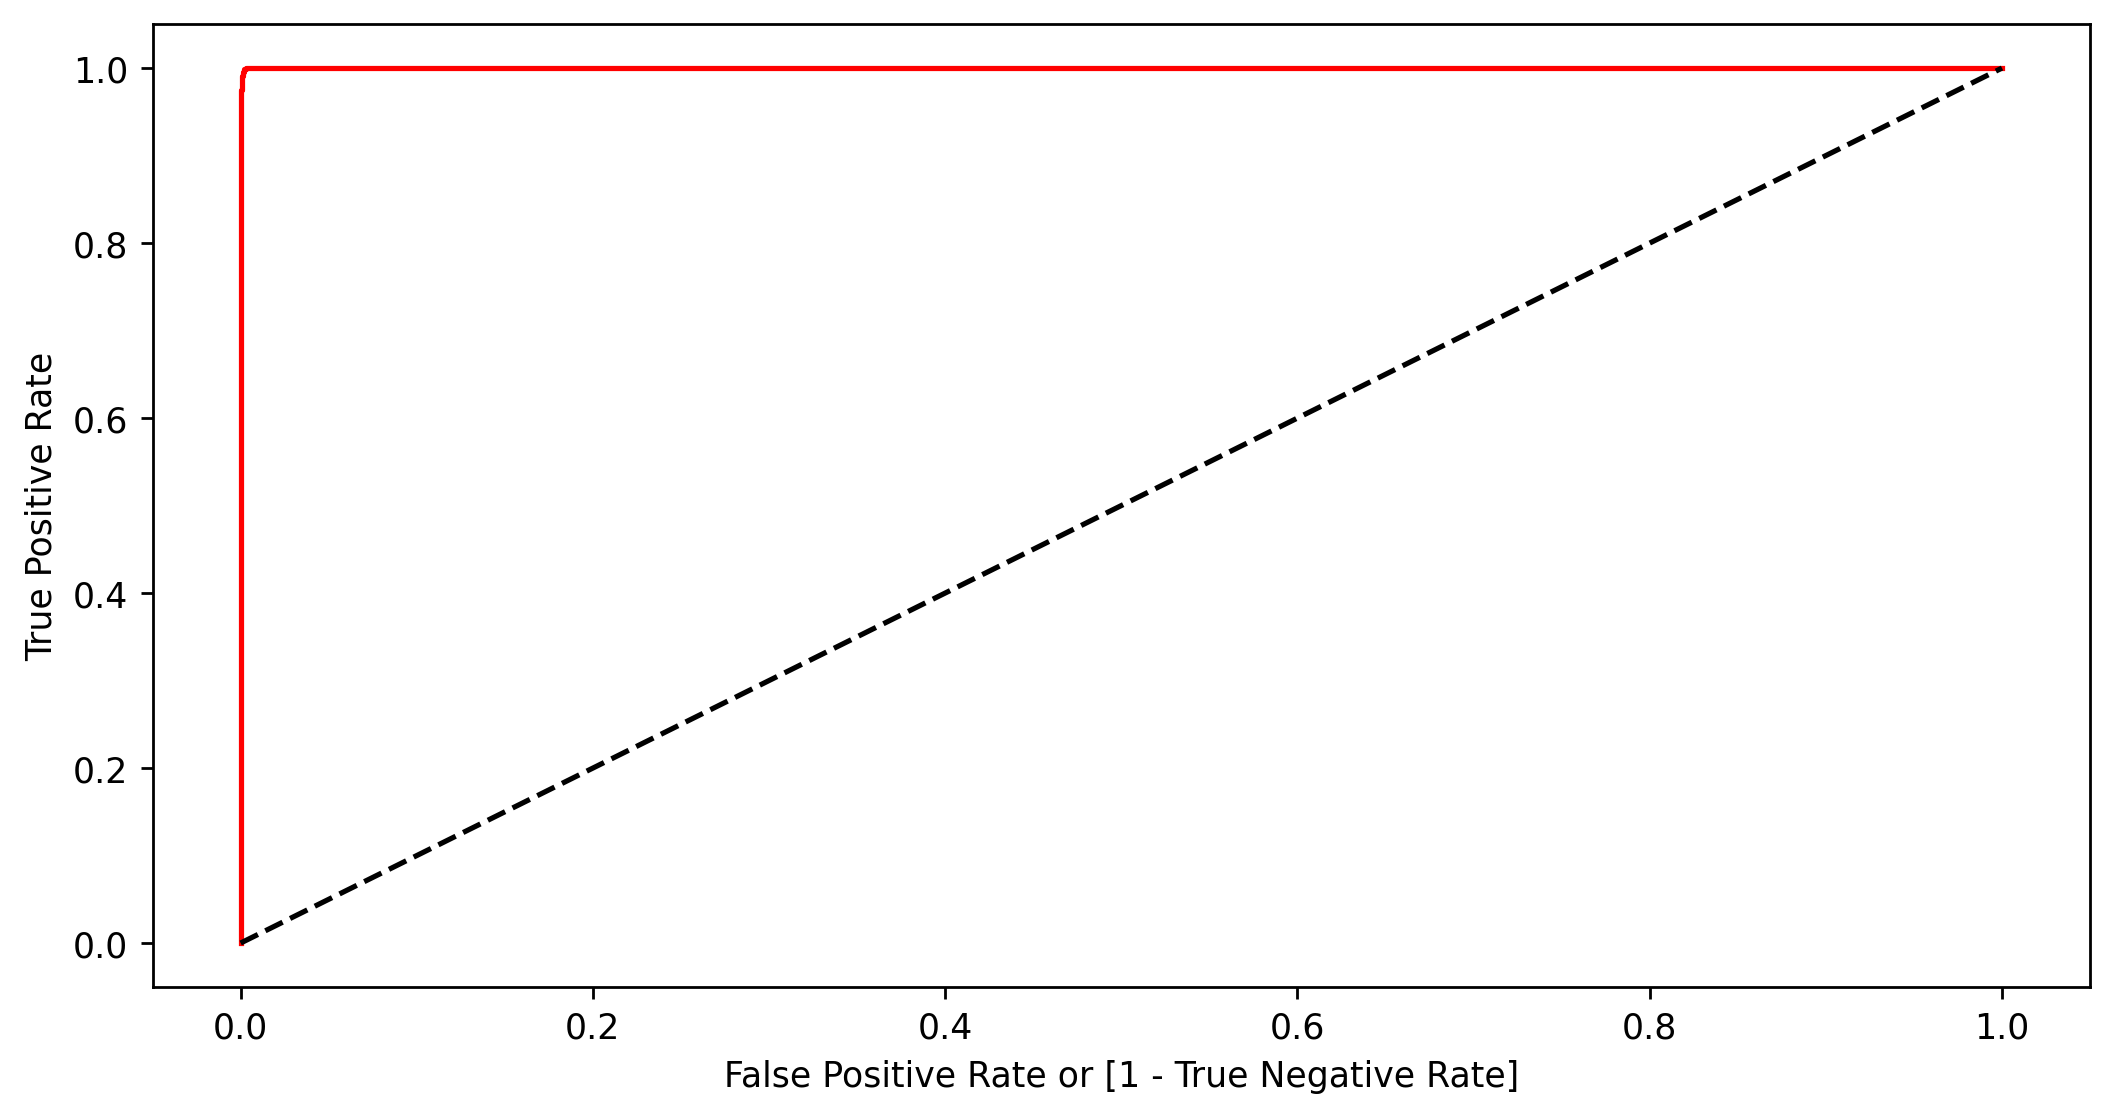

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y_test,preds)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
auc

0.9761331892977172